Tips server makanan di restoran dapat dipengaruhi oleh banyak faktor, termasuk sifat restoran, ukuran pesta, dan lokasi meja di restoran. Manajer restoran perlu mengetahui faktor mana yang penting saat mereka menetapkan meja ke server makanan. Demi moral staf, mereka biasanya ingin menghindari substansi atau kesan perlakuan tidak adil dari server, yang tip (setidaknya di restoran di Amerika Serikat) merupakan komponen utama pembayaran. Di satu restoran, server makanan mencatat data berikut tentang semua pelanggan yang mereka layani selama selang waktu dua setengah bulan di awal tahun 1990. Restoran, yang terletak di pusat perbelanjaan pinggiran kota, adalah bagian dari rantai nasional dan melayani menu yang bervariasi. Untuk mematuhi hukum setempat, restoran menawarkan tempat duduk di bagian bebas rokok kepada pelanggan yang memintanya. Setiap catatan mencakup hari dan waktu, dan jika digabungkan, mereka menunjukkan jadwal kerja server.

Total bill : (biaya makan), termasuk pajak, dalam dolar AS

Tip : (persen) dalam dolar AS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('tips.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Add Columns

In [4]:
data.shape

(244, 7)

In [5]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
data['total_tip'] = data['total_bill'] * data['tip'] / 100
data

,total_bill,tip,sex,smoker,day,time,size,total_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.171599
1,10.34,1.66,Male,No,Sun,Dinner,3,0.171644
2,21.01,3.50,Male,No,Sun,Dinner,3,0.735350
3,23.68,3.31,Male,No,Sun,Dinner,2,0.783808
4,24.59,3.61,Female,No,Sun,Dinner,4,0.887699
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.718576
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.543600
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.453400
242,17.82,1.75,Male,No,Sat,Dinner,2,0.311850


In [7]:
data.shape

(244, 8)

### Kelompok
1. Cicik Thoyba
2. Tsania Hazhiahadani
3. Moch. Andyka Saputra
4. Pipit Wahyuningsih

### Detecting and Handling Missing Value

# 1. Adakah tipe variabel yang kurang tepat di data tersebut?

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   total_tip   244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.4+ KB


In [9]:
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
total_tip     float64
dtype: object

In [10]:
data['sex'] = data['sex'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data['day'] = data['day'].astype('category')
data['time'] = data['time'].astype('category')
data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
total_tip      float64
dtype: object

# 2. Apakah data numeriknya cenderung berdistribusi normal?

C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_tip', ylabel='Density'>

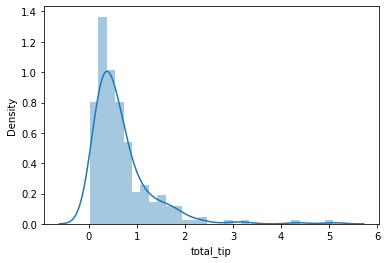

In [11]:
sns.distplot(data['total_tip'], kde=True)

C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

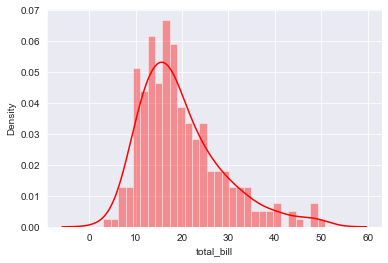

In [12]:
# set the background style of the plot
sns.set_style('darkgrid')
sns.distplot(data['total_bill'], kde = True, color ='red', bins = 30)

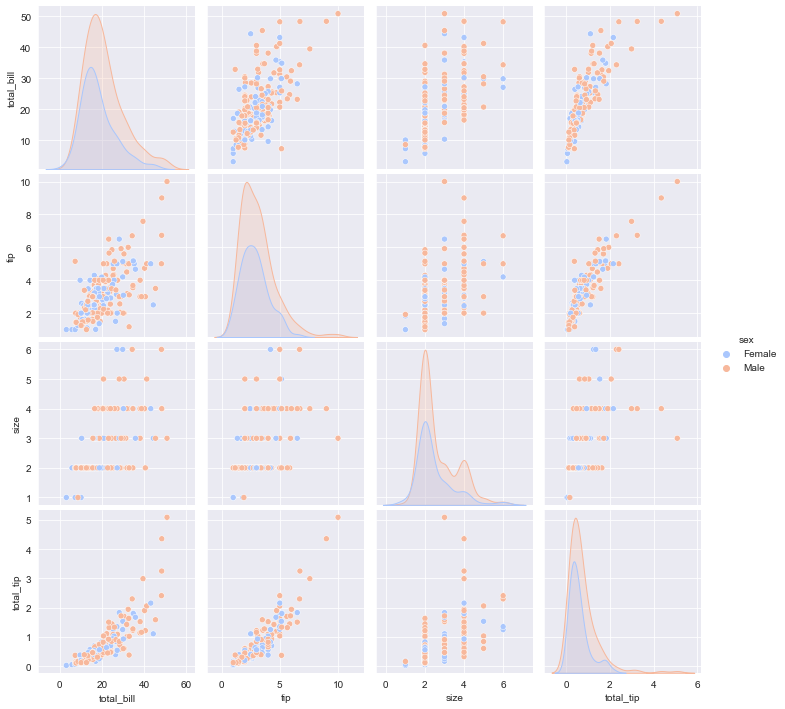

In [13]:
sns.pairplot(data, hue ="sex", palette ='coolwarm')

# 3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?

In [14]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
total_tip     0
dtype: int64

In [15]:
data.duplicated().sum()

1

In [16]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [17]:
data.shape

(243, 8)

In [18]:
data.describe()

,total_bill,tip,size,total_tip
count,243.000000,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016,0.677844
std,8.910071,1.385002,0.952356,0.638875
min,3.070000,1.000000,1.000000,0.030700
25%,13.380000,2.000000,2.000000,0.283375
50%,17.810000,2.920000,2.000000,0.492681
75%,24.175000,3.575000,3.000000,0.835275
max,50.810000,10.000000,6.000000,5.081000


In [19]:
data['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

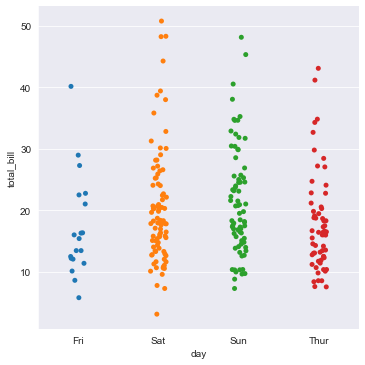

In [20]:
sns.catplot(x='day', y='total_bill', data=data)

<AxesSubplot:>

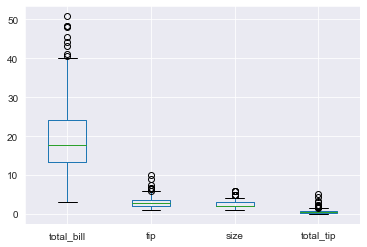

In [21]:
data.boxplot()

# 4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?

In [22]:
data['sex'].value_counts()

Male      157
Female     86
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

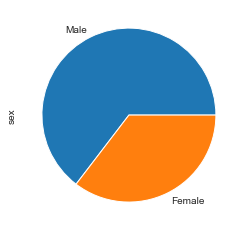

In [23]:
data['sex'].value_counts().plot(kind='pie')

In [24]:
data['smoker'].value_counts()

No     151
Yes     92
Name: smoker, dtype: int64

<AxesSubplot:ylabel='smoker'>

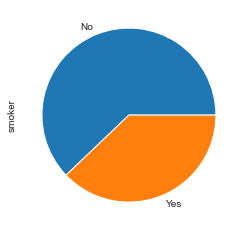

In [25]:
data['smoker'].value_counts().plot(kind='pie')

In [26]:
data['day'].value_counts()

Sat     87
Sun     76
Thur    61
Fri     19
Name: day, dtype: int64

<AxesSubplot:>

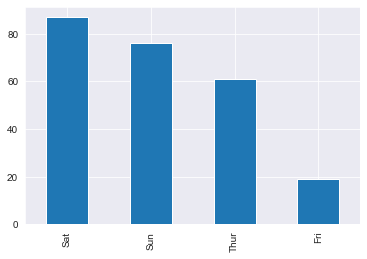

In [27]:
data['day'].value_counts().plot(kind='bar')

In [28]:
data['time'].value_counts()

Dinner    176
Lunch      67
Name: time, dtype: int64

<AxesSubplot:ylabel='time'>

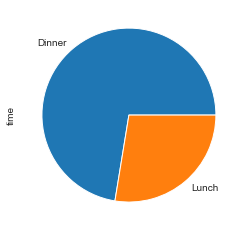

In [29]:
data['time'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

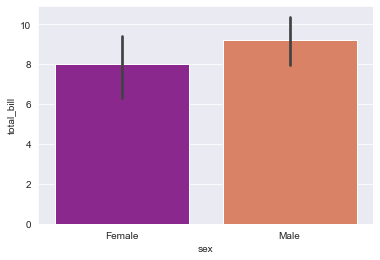

In [30]:
sns.set_style('darkgrid')
sns.barplot(x ='sex', y ='total_bill', data = data,
            palette ='plasma', estimator = np.std)


# 5. Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?

<AxesSubplot:xlabel='sex', ylabel='tip'>

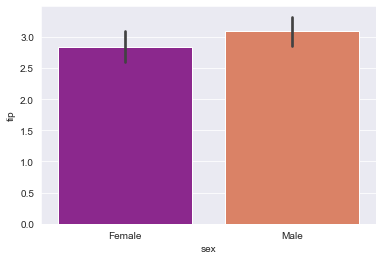

In [31]:
sns.barplot(x ='sex', y ='tip', data = data, palette ='plasma')

<AxesSubplot:xlabel='sex', ylabel='tip'>

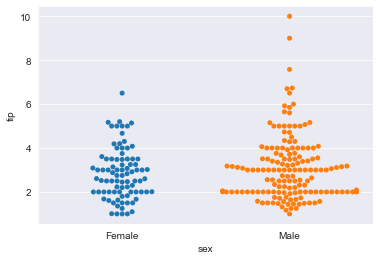

In [32]:
sns.swarmplot(x ='sex', y ='tip', data = data)

<AxesSubplot:xlabel='sex', ylabel='tip'>

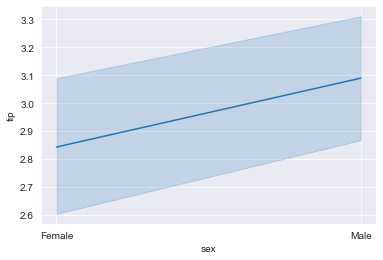

In [33]:
sns.lineplot(x="sex", y="tip", data=data)

<AxesSubplot:xlabel='day', ylabel='tip'>

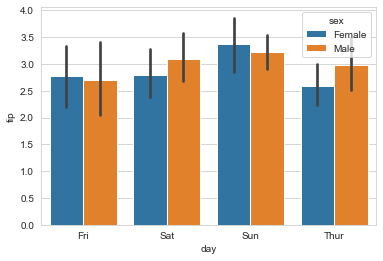

In [48]:
sns.barplot(x='day',y='tip', data=data,
            hue='sex')

# 6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?

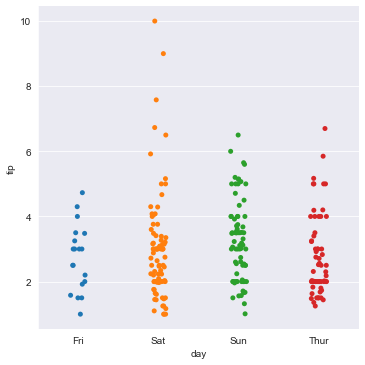

In [34]:
sns.catplot(x='day', y='tip', data=data)

C:\Users\25and\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


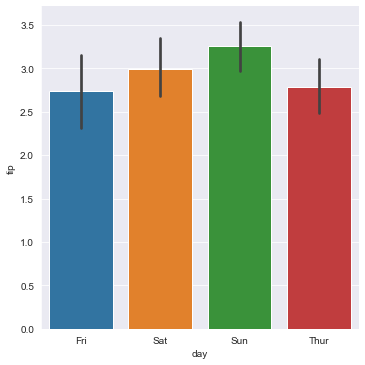

In [35]:
sns.factorplot(x ='day', y ='tip', data = data, kind ='bar')

In [36]:
data.pivot_table(index='day',
                 values='tip',
                aggfunc='mean').round(2)

,tip
day,
Fri,2.73
Sat,2.99
Sun,3.26
Thur,2.78


# 7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?

<AxesSubplot:xlabel='day', ylabel='tip'>

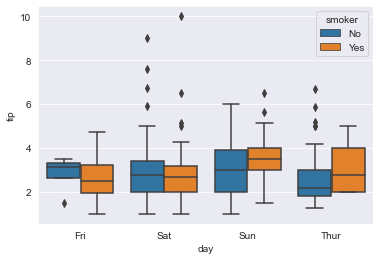

In [37]:
sns.boxplot(x ='day', y ='tip', data = data, hue ='smoker')

<AxesSubplot:xlabel='day', ylabel='tip'>

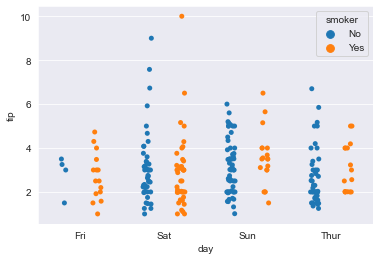

In [38]:
sns.stripplot(x ='day', y ='tip', data = data,
            jitter = True, hue ='smoker', dodge = True)

In [39]:
perokok = pd.pivot_table(data, 
                         index=['smoker'], 
                         values=['tip'], 
                         aggfunc='sum').round(2)
perokok

,tip
smoker,
No,451.77
Yes,277.81


<AxesSubplot:xlabel='smoker'>

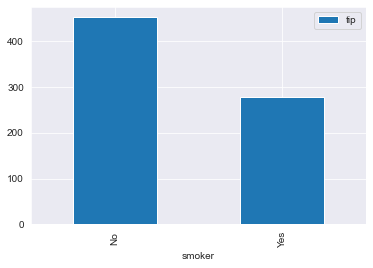

In [40]:
perokok.plot(kind='bar')

# 8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?

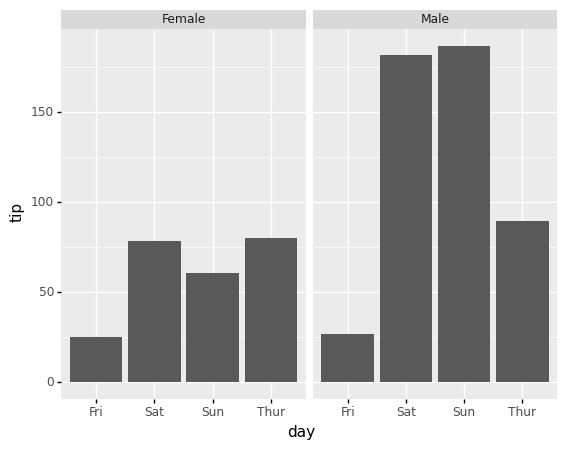

<ggplot: (174489479108)>

In [41]:
from plotnine import ggplot, aes, facet_grid, labs, geom_col

(
    ggplot(data)
    + facet_grid(facets="~sex")
    + aes(x="day", y="tip")
    + labs(
        x="day",
        y="tip",
    )
    + geom_col()
)


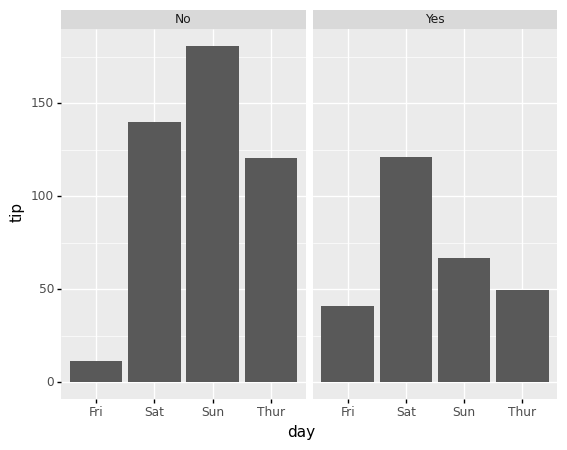

<ggplot: (174489639879)>

In [42]:
from plotnine import ggplot, aes, facet_grid, labs, geom_col

(
    ggplot(data)
    + facet_grid(facets="~smoker")
    + aes(x="day", y="tip")
    + labs(
        x="day",
        y="tip",
    )
    + geom_col()
)


# 9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)

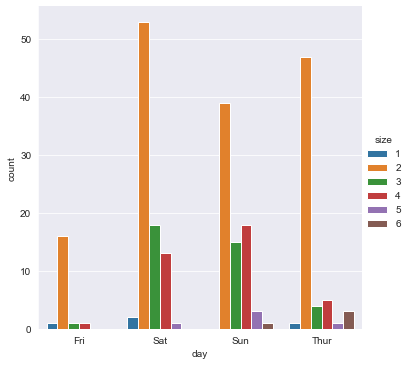

In [43]:
sns.catplot(x ="day", hue ="size",
kind ="count", data = data)

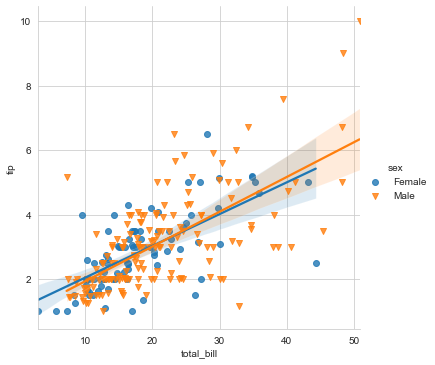

In [44]:
sns.set_style('whitegrid')
sns.lmplot(x ='total_bill', y ='tip', data = data,
        hue ='sex', markers =['o', 'v'])

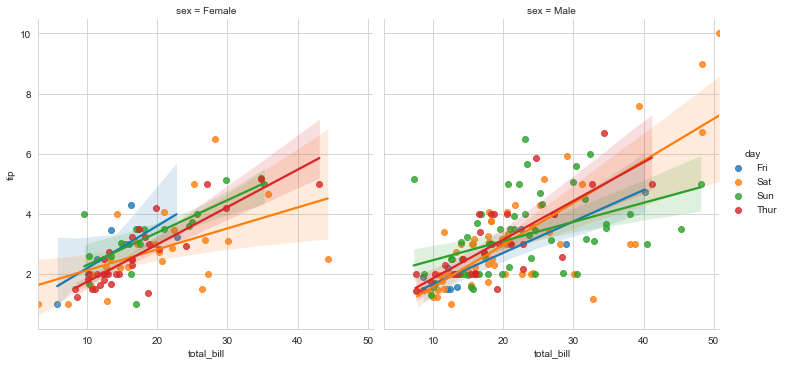

In [45]:
sns.lmplot(x ='total_bill', y ='tip', data = data,
        col ='sex', hue ='day')

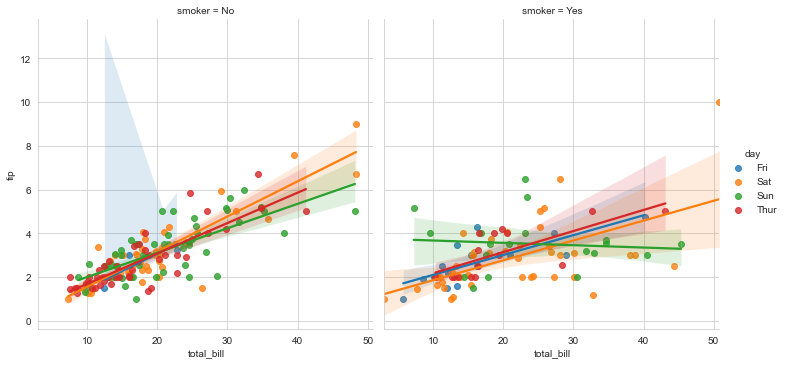

In [46]:
sns.lmplot(x ='total_bill', y ='tip', data = data,
        col ='smoker', hue ='day')

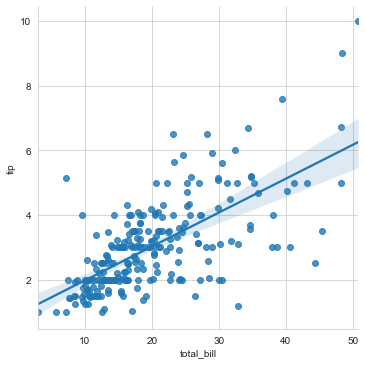

In [47]:
sns.set_style('whitegrid')
sns.lmplot(x ='total_bill', y ='tip', data = data)

<AxesSubplot:xlabel='total_tip'>

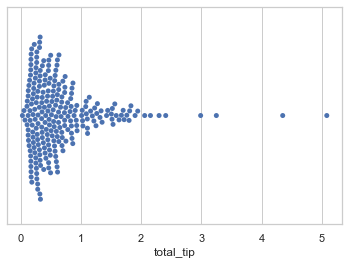

In [51]:
sns.set(style="whitegrid")
sns.swarmplot(x=data["total_tip"])


C:\Users\25and\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
C:\Users\25and\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


<AxesSubplot:xlabel='total_tip', ylabel='day'>

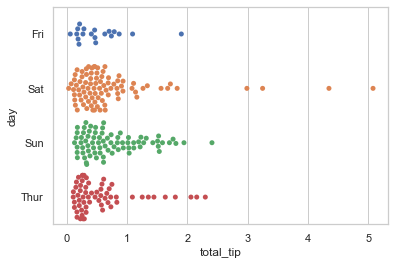

In [52]:
sns.set(style="whitegrid")
sns.swarmplot(x="total_tip", y="day", data=data)

C:\Users\25and\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
C:\Users\25and\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.


<AxesSubplot:xlabel='day', ylabel='total_tip'>

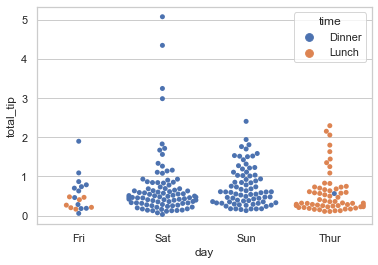

In [53]:
sns.set(style="whitegrid")
sns.swarmplot(x="day", y="total_tip", hue="time", data=data)